In [2]:
import numpy as np
from PIL import Image 
from PIL import ImageFilter
import matplotlib.pyplot as plt 
import time


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# train
trainImages = []
trainLabels = []

readFile = open("/kaggle/input/unibuc-dhc-2023/train.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.split(",")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/train_images/" + pair[0])
    imageArray = np.asarray(image) 
    image.close()
    trainImages.append(imageArray) # adaug imaginea in vectorul corespunzator
    trainLabels.append(int(pair[1])) # adaug labelul pozei in vectorul corespunzator
    pair = readFile.readline()
        
        
# validation
validationImages = []
validationLabels = []

readFile = open("/kaggle/input/unibuc-dhc-2023/val.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.split(",")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/val_images/" + pair[0])
    imageArray = np.asarray(image) 
    image.close()
    validationImages.append(imageArray) # adaug imaginea in vectorul corespunzator
    validationLabels.append(int(pair[1])) # adaug labelul pozei in vectorul corespunzator
    pair = readFile.readline()
        

        
# test


testImages = []
testImageNames = []
        
readFile = open("/kaggle/input/unibuc-dhc-2023/test.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.rstrip("\n")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/test_images/" + pair)
    imageArray = np.asarray(image) 
    image.close()
    testImageNames.append(pair)
    testImages.append(imageArray) 
    pair = readFile.readline()
    

# arr = np.array(trainImages)
# print(arr.shape)
# print("test")

        
        
trainImages = np.stack(trainImages, axis=0)
validationImages = np.stack(validationImages, axis=0)
trainLabels = np.stack(trainLabels, axis=0)
validationLabels = np.stack(validationLabels, axis=0)

trainImages = trainImages/255
validationImages = validationImages/255
        
        
testImages = np.stack(testImages, axis=0)
testImages = testImages/255

megaTrain = np.concatenate((trainImages, validationImages),axis=0)
megaTrainLabels = np.concatenate((trainLabels, validationLabels),axis=0)

In [33]:

# classes = np.zeros(96,dtype=int)
# for i in trainLabels:
#     classes[i] += 1
   
# plt.figure(figsize=(10,6))
# plt.hist(trainLabels, bins=96, color="purple",ec="black")
# plt.plot

# print(classes)
print(testImages.shape) 

(5000, 64, 64, 3)


In [37]:
def validate(model, validationImages, validationLabels):
    
    # Convert validation labels to numpy array
    validationLabels = np.array(validationLabels)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(validationImages, validationLabels)
    
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)
    
    
def createSubmission(model, testImages):
    predicted = model.predict(testImages)
    predicted_classes = np.argmax(predicted, axis=1)
    f = open("submissionFinal.csv", "w")
    f.write("Image,Class\n")
    for i in range(len(testImages)):
        string = str(testImageNames[i]).rstrip('\n') + "," + str(predicted_classes[i]).rstrip('\n') + "\n"
        f.write(string)
    f.close()

In [ ]:
print(testImageNames[2])

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='gelu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.45))
model.add(layers.Dense(96, activation='sigmoid'))


#%%

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)



32/32 [==============================] - 0s 4ms/step - loss: 1.2305 - accuracy: 0.6480
Validation Loss: 1.2304561138153076
Validation Accuracy: 0.6480000019073486


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 3ms/step - loss: 2.0590 - accuracy: 0.6270
Validation Loss: 2.0589864253997803
Validation Accuracy: 0.6269999742507935


In [39]:
#all gelu

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))#gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='gelu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 6ms/step - loss: 2.4247 - accuracy: 0.6390
Validation Loss: 2.4247043132781982
Validation Accuracy: 0.6389999985694885


In [44]:
#end with relu

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))#gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 8ms/step - loss: 2.3643 - accuracy: 0.6090
Validation Loss: 2.364319324493408
Validation Accuracy: 0.609000027179718


In [45]:
#end with gelu

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='gelu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 3ms/step - loss: 2.3243 - accuracy: 0.6240
Validation Loss: 2.3243319988250732
Validation Accuracy: 0.6240000128746033


In [46]:
#endalternate gelu and relu

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=40, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 4ms/step - loss: 2.1911 - accuracy: 0.6980
Validation Loss: 2.1911439895629883
Validation Accuracy: 0.6980000138282776


In [48]:
#endalternate gelu and relu

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='swish'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=40, validation_data=(validationImages, validationLabels),verbose=0)



validate(model, validationImages, validationLabels)

32/32 [==============================] - 0s 4ms/step - loss: 2.1156 - accuracy: 0.6960
Validation Loss: 2.1155507564544678
Validation Accuracy: 0.6959999799728394


In [49]:
# dropoutlayer 40 epoch without = 68
# dropout 0.25 4 epoch = 67.5
# dropout 0.69 4 epoch = 73.6

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.69))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=40,verbose=0)




validate(model, validationImages, validationLabels)

2023-06-20 19:33:27.659144: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 0s 4ms/step - loss: 1.1061 - accuracy: 0.7530
Validation Loss: 1.1061218976974487
Validation Accuracy: 0.753000020980835


In [39]:
# dropout 69 80 epoch = 76
# dropout 75 80 epoch = 75
# dropout 72 80 epoch = 76.4
# dropout 55 80 epoch = 75
# dropout 65 80 epoch = 73
# dropout 31 80 epoch = 69


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=40,verbose=0)




validate(model, validationImages, validationLabels)

2023-06-20 16:38:11.035947: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 0s 4ms/step - loss: 1.1649 - accuracy: 0.7650
Validation Loss: 1.1649032831192017
Validation Accuracy: 0.7649999856948853


In [ ]:
# dropout 72 after dense 0.748
# dropout before and after 50+25 = 0.746
# dropout before and after 72+25 = 0.7849
# dropout before and after 72+25 120 epochs = 0.796
# dropout before and after 72+25 40 epochs = .778
# dropout before and after 72+25 40 epochs + swish dense= 765
# dropout before and after 72+25 40 epochs + swish 2d= 757
# dropout before and after 72+25 40 epochs + swish 2*2d= 768
# dropout before and after 72+25 40 epochs + swish 3*2d= 75
# dropout before and after 72+20 40 epochs + swish + gelu + swish= 73
# dropout before and after 72+20 40 epochs + swish + relu + swish= 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='swish', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='swish')) #gelu
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=40,verbose=1)




validate(model, validationImages, validationLabels)

Epoch 1/120


2023-06-20 16:30:10.336657: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 13s 14ms/step - loss: 4.3210 - accuracy: 0.0831
Epoch 2/120
188/188 [==============================] - 3s 14ms/step - loss: 3.2444 - accuracy: 0.2260
Epoch 3/120
188/188 [==============================] - 3s 13ms/step - loss: 2.5176 - accuracy: 0.3399
Epoch 4/120
188/188 [==============================] - 3s 13ms/step - loss: 2.1033 - accuracy: 0.4236
Epoch 5/120
188/188 [==============================] - 3s 13ms/step - loss: 1.8213 - accuracy: 0.4818
Epoch 6/120
188/188 [==============================] - 3s 14ms/step - loss: 1.6534 - accuracy: 0.5199
Epoch 7/120
188/188 [==============================] - 3s 13ms/step - loss: 1.5284 - accuracy: 0.5508
Epoch 8/120
188/188 [==============================] - 3s 13ms/step - loss: 1.3662 - accuracy: 0.5972
Epoch 9/120
188/188 [==============================] - 3s 13ms/step - loss: 1.2936 - accuracy: 0.6081
Epoch 10/120
188/188 [==============================] - 3s 14ms/step - loss: 1.2100 - accurac

<Figure size 1000x1000 with 0 Axes>

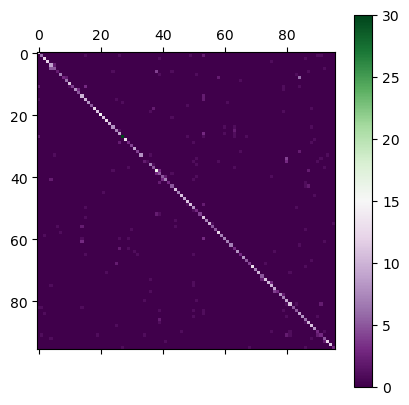

In [38]:
# batch normalization
#  III => 0.623
#  all -> 0,763
# all + relu -> 0.72
# all 120 - 0.75
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 
model.fit(trainImages, trainLabels, batch_size=64, epochs=120,verbose=1)




validate(model, validationImages, validationLabels)

predicted = model.predict(validationImages)
predicted_classes = np.argmax(predicted, axis=1)

confusionMatrix = np.zeros((96, 96))
for i in range(len(validationImages)):
    confusionMatrix[validationLabels[i],predicted_classes[i]] += 1
    
plt.figure(figsize=(10,10))
plt.matshow(confusionMatrix,cmap='PRGn')
plt.colorbar()
plt.show()


In [ ]:
# data augmentation 


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(96, activation='softmax'))

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate the images by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift the width of the images by up to 10%
    height_shift_range=0.1, # Randomly shift the height of the images by up to 10%
    zoom_range=0.2,         # Randomly zoom in/out on the images by up to 20%
    horizontal_flip=True,   # Randomly flip the images horizontally
    fill_mode='nearest'     # Fill any newly created pixels after rotation or shifting
)

# Apply data augmentation to the training dataset
train_generator = datagen.flow(trainImages, trainLabels, batch_size=64)




# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 

lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)
# model.fit(trainImages, trainLabels, batch_size=64, epochs=120, verbose=1, callbacks=[lr_scheduler])

# validate(model, validationImages, validationLabels)

# Compile the model with the optimizer and loss function
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Fit the model using the augmented data generator
model.fit(train_generator, epochs=40, verbose=1,callbacks=[lr_scheduler])
validate(model, validationImages, validationLabels)

In [ ]:
# data augmentation 
# 120 epoch
# 20 epoch = 63
# 20 epoch no scheduler 64 i gues??


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(96, activation='softmax'))

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate the images by up to 20 degrees
#     width_shift_range=0.05,  # Randomly shift the width of the images by up to 10%
#     height_shift_range=0.05, # Randomly shift the height of the images by up to 10%
    zoom_range=0.2,         # Randomly zoom in/out on the images by up to 20%
    horizontal_flip=True,   # Randomly flip the images horizontally
    fill_mode='nearest'     # Fill any newly created pixels after rotation or shifting
)

# Apply data augmentation to the training dataset
train_generator = datagen.flow(trainImages, trainLabels, batch_size=64)




# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 

lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)
# model.fit(trainImages, trainLabels, batch_size=64, epochs=120, verbose=1, callbacks=[lr_scheduler])

# validate(model, validationImages, validationLabels)

# Compile the model with the optimizer and loss function
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Fit the model using the augmented data generator
model.fit(train_generator, epochs=20, verbose=1)
validate(model, validationImages, validationLabels)

In [36]:
# submit with n

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(96, activation='softmax'))


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 

lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)
model.fit(trainImages, trainLabels, batch_size=64, epochs=120, verbose=1, callbacks=[lr_scheduler])

validate(model, validationImages, validationLabels)

Epoch 1/120


2023-06-20 18:32:12.185544: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 12s 14ms/step - loss: 4.3568 - accuracy: 0.0733 - lr: 0.0010
Epoch 2/120
188/188 [==============================] - 2s 13ms/step - loss: 3.3385 - accuracy: 0.2097 - lr: 0.0010
Epoch 3/120
188/188 [==============================] - 2s 13ms/step - loss: 2.6053 - accuracy: 0.3262 - lr: 0.0010
Epoch 4/120
188/188 [==============================] - 3s 14ms/step - loss: 2.1525 - accuracy: 0.4149 - lr: 0.0010
Epoch 5/120
188/188 [==============================] - 2s 13ms/step - loss: 1.9091 - accuracy: 0.4659 - lr: 0.0010
Epoch 6/120
188/188 [==============================] - 2s 13ms/step - loss: 1.6821 - accuracy: 0.5134 - lr: 0.0010
Epoch 7/120
188/188 [==============================] - 2s 13ms/step - loss: 1.5509 - accuracy: 0.5497 - lr: 0.0010
Epoch 8/120
188/188 [==============================] - 2s 13ms/step - loss: 1.4293 - accuracy: 0.5738 - lr: 0.0010
Epoch 9/120
188/188 [==============================] - 2s 13ms/step - loss: 1.3573 - accura

NameError: name 'validate' is not defined

In [ ]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#relu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='gelu')) #gelu
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.72))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(96, activation='softmax'))



model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy']) 

lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)
model.fit(trainImages, trainLabels, batch_size=64, epochs=20, verbose=1, callbacks=[lr_scheduler])

validate(model, validationImages, validationLabels)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from PIL import Image # Pentru porcesari de imagine
from PIL import ImageFilter # Pentru adaugarea de noise peste datele de train -> mai multe date de antrenare
import matplotlib.pyplot as plt # Pentru afisarea matricii de confuzie
import time



# train
trainImages = []
trainLabels = []

readFile = open("/kaggle/input/unibuc-dhc-2023/train.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.split(",")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/train_images/" + pair[0])
    imageArray = np.asarray(image).flatten() 
    image.close()
    trainImages.append(imageArray) 
    trainLabels.append(int(pair[1]))
    pair = readFile.readline()
        
        
# validation
validationImages = []
validationLabels = []

readFile = open("/kaggle/input/unibuc-dhc-2023/val.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.split(",")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/val_images/" + pair[0])
    imageArray = np.asarray(image).flatten() 
    image.close()
    validationImages.append(imageArray) 
    validationLabels.append(int(pair[1]))
    pair = readFile.readline()
        

        
# test


testImages = []
testImageNames = []
        
readFile = open("/kaggle/input/unibuc-dhc-2023/test.csv",'r')
pair = readFile.readline() #trecem peste prima linie
pair = readFile.readline()
while pair:
    pair = pair.rstrip("\n")
    image = Image.open("/kaggle/input/unibuc-dhc-2023/test_images/" + pair)
    imageArray = np.asarray(image).flatten()  
    image.close()
    testImageNames.append(pair)
    testImages.append(imageArray) 
    pair = readFile.readline()
    

# arr = np.array(trainImages)
# print(arr.shape)
# print("test")
# print(testImageNames[2])

        
        
trainImages = np.stack(trainImages, axis=0)
validationImages = np.stack(validationImages, axis=0)
trainLabels = np.stack(trainLabels, axis=0)
validationLabels = np.stack(validationLabels, axis=0)

trainImages = trainImages/255
validationImages = validationImages/255
        
        
testImages = np.stack(testImages, axis=0)
testImages = testImages/255

megaTrain = np.concatenate((trainImages, validationImages),axis=0)
megaTrainLabels = np.concatenate((trainLabels, validationLabels),axis=0)


model = MultinomialNB()
# antrenarea modelului
start = time.process_time()
model.fit(trainImages, trainLabels)
print("Time taken: " + str(time.process_time() - start))


predicted = model.predict(validationImages)

print(model.score(validationImages, validationLabels))




model = MultinomialNB()
# antrenarea modelului
start = time.process_time()
model.fit(megaTrain, megaTrainLabels)
print("Time taken: " + str(time.process_time() - start))

predicted = model.predict(testImages)
f = open("submissionNB.csv", "w")
f.write("Image,Class\n")
for i in range(len(testImages)):
    string = str(testImageNames[i]).rstrip('\n') + "," + str(predicted[i]).rstrip('\n') + "\n"
    f.write(string)
f.close()


model.fit(trainImages, trainLabels)
predicted = model.predict(validationImages)

confusionMatrix = np.zeros((96, 96))
for i in range(len(validationImages)):
    confusionMatrix[validationLabels[i], predicted[i]] += 1
    
plt.figure(figsize=(10,10))
plt.matshow(confusionMatrix,cmap='PRGn')
plt.colorbar()
plt.show()






In [35]:

print(testImages.shape)

(5000, 64, 64, 3)
